########################################################<br>
 Python script template for Question 3 (IAML Level 10)<br>
 Note that:<br>
 - You should not change the name of this file, 'iaml01cw2_q3.py', which is the file name you should use when you submit your code for this question.<br>
 - You should write code for the functions defined below. Do not change their names.<br>
 - You can define function arguments (parameters) and returns (attributes) if necessary.<br>
 - In case you define additional functions, do not define them here, but put them in a separate Python module file, "iaml01cw2_my_helpers.py", and import it in this script.<br>
 - For those questions requiring you to show results in tables, your code does not need to present them in tables - just showing them with print() is fine.<br>
 - You do not need to include this header in your submission.<br>
########################################################

-- Code for loading modules and the data set and pre-processing ---><br>
NB: You can edit the following and add code (e.g. code for loading sklearn) if necessary.

In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from scipy.cluster import hierarchy
from iaml01cw2_helpers import *
from iaml01cw2_my_helpers import *

C:\Users\Petros Laptop\Anaconda3\envs\py3iaml\lib\site-packages\sklearn\utils\__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Sequence


In [2]:
data_path = os.path.join(os.getcwd(), 'data')
Xtrn, Ytrn, Xtst, Ytst = load_CoVoST2(data_path)
print(Xtrn.shape)
print(Ytrn.shape)
print(Xtst.shape)
print(Ytst.shape)
languages = ["Arabic","Catalan","Welsh","German","English","Spanish","Estonian","Persian","French","Indonesian","Italian","Japanese","Latvian","Mongolian","Dutch","Russian","Slovenian","Swedish","Portuguese","Tamil","Turkish","Chinese"]
abbreviations = ["Ar","Ca","Cy","De","En","Es","Et","Fa","Fr","Id","It","Ja","Lv","Mn","Nl","Ru","Sl","Sv","Pt","Ta","Tr","Zh"]

(22000, 26)
(22000,)
(2200, 26)
(2200,)


----

Q3.1

In [33]:
def iaml01cw2_q3_1():
    
    kmeans = KMeans(n_clusters=22, random_state=1)  
    kmeans.fit(Xtrn)
    cluster_centers = kmeans.cluster_centers_
    print(cluster_centers.shape)
    labels = kmeans.labels_
    print(labels.shape)

    for i in range(len(np.unique(labels))):
        count = 0
        for entry in labels:
            if(entry==i): 
                count += 1
        print(f"For centre {i}: the number of samples is {count}.")
            
    print(f"\nThe total sum of squared distances of samples to their closest centre is {kmeans.inertia_}.")
    
    return kmeans
        
t1 = time.time()
kmeans = iaml01cw2_q3_1()
t2 = time.time()
print(f"Time taken = {t2-t1}")

(22, 26)
(22000,)
For centre 0: the number of samples is 1018.
For centre 1: the number of samples is 1125.
For centre 2: the number of samples is 1191.
For centre 3: the number of samples is 890.
For centre 4: the number of samples is 1162.
For centre 5: the number of samples is 1332.
For centre 6: the number of samples is 839.
For centre 7: the number of samples is 623.
For centre 8: the number of samples is 1400.
For centre 9: the number of samples is 838.
For centre 10: the number of samples is 659.
For centre 11: the number of samples is 1276.
For centre 12: the number of samples is 121.
For centre 13: the number of samples is 152.
For centre 14: the number of samples is 950.
For centre 15: the number of samples is 1971.
For centre 16: the number of samples is 1251.
For centre 17: the number of samples is 845.
For centre 18: the number of samples is 896.
For centre 19: the number of samples is 930.
For centre 20: the number of samples is 1065.
For centre 21: the number of samples 

Q3.2

(22, 26)
(22, 26)
(22, 2)
(22, 2)


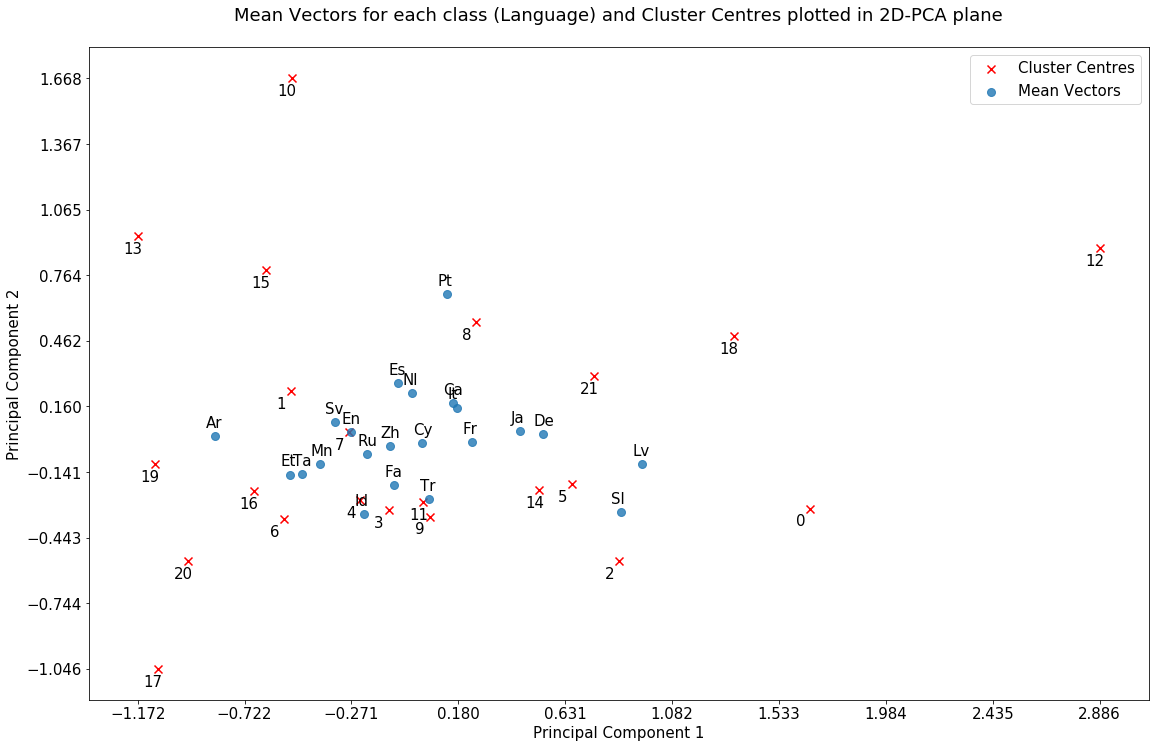

In [40]:
plt.rcParams['figure.figsize'] = (19, 12)
plt.rcParams['font.size'] = 15
plt.rcParams['lines.markersize'] = 8

def iaml01cw2_q3_2():
    
    mean_vectors=[]
    for i in range(len(languages)): 
        samples = []
        for x in range(len(Xtrn)):
            sample_label = Ytrn[x]
            if(sample_label==i):  
                samples.append(Xtrn[x])
        
        samples = np.array(samples)
        #print(samples.shape)
        mean_vectors.append(np.mean(samples, axis=0))
    
    mean_vectors = np.array(mean_vectors)
    print(mean_vectors.shape)
    pca = PCA(n_components=2)  
    pca = pca.fit(mean_vectors) 
    pcs = pca.components_
    pc1 = pcs[0]
    pc2 = pcs[1]
    
    cluster_centers = kmeans.cluster_centers_
    print(cluster_centers.shape)
    
    transformed_centres = pca.transform(cluster_centers)
    print(transformed_centres.shape)
    transformed_vectors = pca.transform(mean_vectors)
    print(transformed_vectors.shape)
    
    plt.scatter(transformed_centres[:,0], transformed_centres[:,1], marker = 'x', color = 'r', label = 'Cluster Centres')
    plt.scatter(transformed_vectors[:,0], transformed_vectors[:,1], label = 'Mean Vectors', alpha = 0.8)
    
    for i, txt in enumerate(abbreviations):
        x, y = transformed_centres[i,0], transformed_centres[i,1]
        plt.annotate(i, (x,y) , xytext = (x-0.06, y-0.08))
        x, y = transformed_vectors[i,0], transformed_vectors[i,1]
        plt.annotate(txt, (x,y) , xytext = (x-0.04, y+0.04))
        
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.xticks(np.linspace(min(transformed_centres[:,0]),max(transformed_centres[:,0]),10))
    plt.yticks(np.linspace(min(transformed_centres[:,1]),max(transformed_centres[:,1]),10))
    plt.title("Mean Vectors for each class (Language) and Cluster Centres plotted in 2D-PCA plane\n ")
    plt.legend()
    plt.show()
    
    return mean_vectors

mean_vectors = iaml01cw2_q3_2() 

Q3.3

(22, 26)


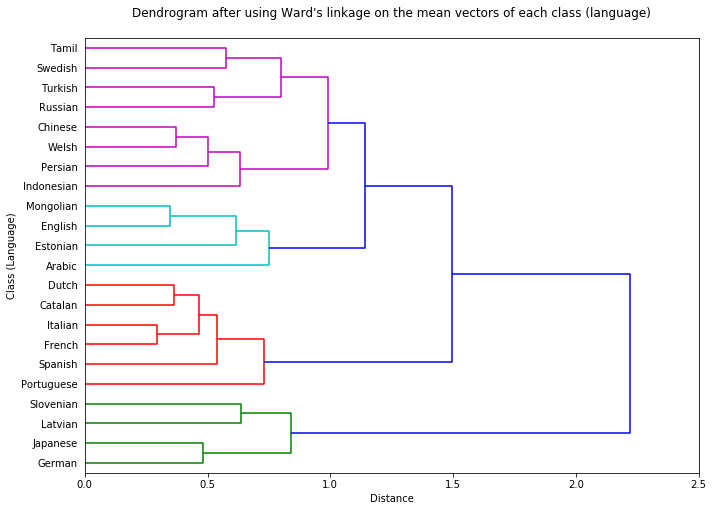

In [5]:
plt.rcParams['figure.figsize'] = (11, 8)
plt.rcParams['font.size'] = 10

def iaml01cw2_q3_3():
    
    print(mean_vectors.shape)
    hcl = hierarchy.ward(mean_vectors)
    dend = hierarchy.dendrogram(hcl, orientation='right', labels = languages, color_threshold = 1)  
    plt.ylabel("Class (Language)")
    plt.xlabel("Distance")
    plt.xticks(np.linspace(0,2.5,6))
    plt.title("Dendrogram after using Ward's linkage on the mean vectors of each class (language)\n")
    plt.show()

iaml01cw2_q3_3()

Q3.4

(66, 26)


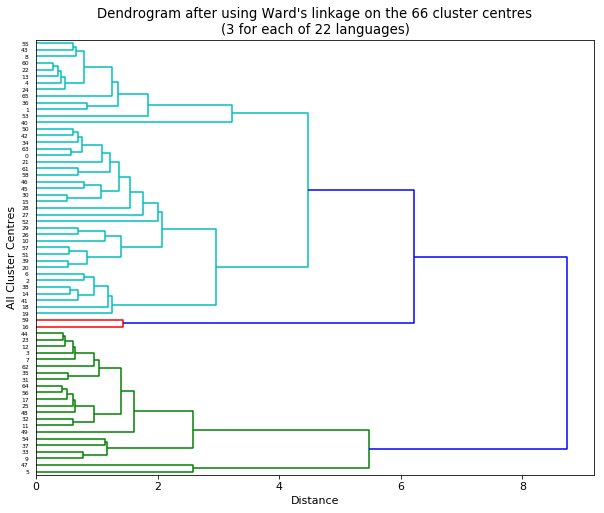

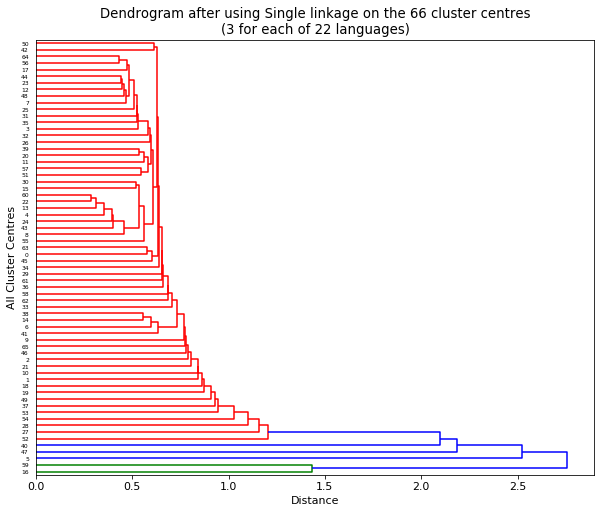

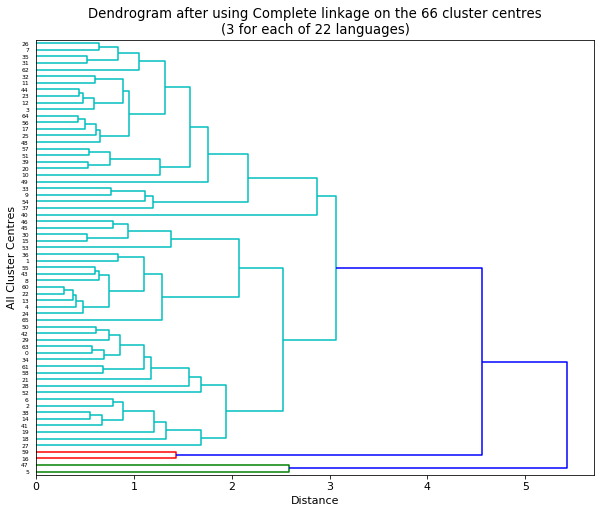

In [21]:
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['font.size'] = 11

def iaml01cw2_q3_4():
    
    combined = []
    
    for i in range(len(languages)):  
        samples = []
        for x in range(len(Xtrn)):
            sample_label = Ytrn[x]
            if(sample_label==i):  
                samples.append(Xtrn[x])
        
        samples = np.array(samples)
        kmeans = KMeans(n_clusters=3, random_state=1)  
        kmeans.fit(samples)
        combined.append(kmeans.cluster_centers_)
        
    combined = np.array(combined).reshape((66,26))    
    print(combined.shape)
    methods = ["Ward's", "Single", "Complete"]
    
    for method in methods:
        
        if(method=="Ward's"):
            hcl = hierarchy.ward(combined)
        elif(method=="Single"):
            hcl = hierarchy.single(combined)
        elif(method=="Complete"):
            hcl = hierarchy.complete(combined)
    
        
        dend = hierarchy.dendrogram(hcl, orientation='right')
        plt.ylabel("All Cluster Centres")
        plt.xlabel("Distance")
        plt.title(f"Dendrogram after using {method} linkage on the 66 cluster centres\n(3 for each of 22 languages)")
        plt.show()

iaml01cw2_q3_4()   

Q3.5


With k=1:
diag
Train accuracy: 14.280
Test accuracy : 13.843
full
Train accuracy: 16.394
Test accuracy : 15.811

With k=3:
diag
Train accuracy: 15.395
Test accuracy : 15.040
full
Train accuracy: 18.000
Test accuracy : 16.895

With k=5:
diag
Train accuracy: 16.017
Test accuracy : 15.913
full
Train accuracy: 19.042
Test accuracy : 16.731

With k=10:
diag
Train accuracy: 16.847
Test accuracy : 16.513
full
Train accuracy: 21.054
Test accuracy : 15.805

With k=15:
diag
Train accuracy: 17.611
Test accuracy : 16.861
full
Train accuracy: 22.911
Test accuracy : 11.655


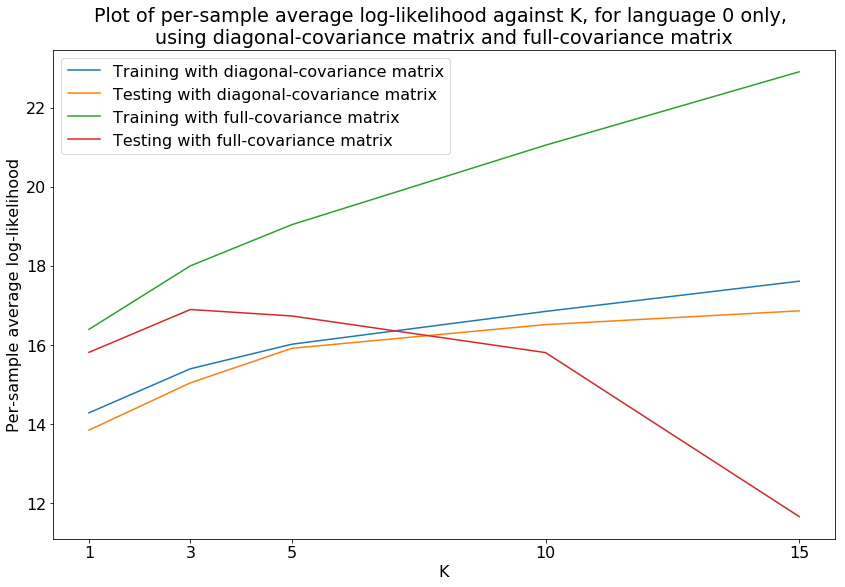

In [28]:
plt.rcParams['figure.figsize'] = (14, 9)
plt.rcParams['font.size'] = 16

def iaml01cw2_q3_5():
  
    train = []
    for x in range(len(Xtrn)):
        sample_label = Ytrn[x]
        if(sample_label==0):    #for Language 0 only
            train.append(Xtrn[x])
            
    test = []
    for x in range(len(Xtst)):
        sample_label = Ytst[x]
        if(sample_label==0):    #for Language 0 only
            test.append(Xtst[x])  
            
    train = np.array(train)
    test = np.array(test)
    
    ks = [1,3,5,10,15]
    covariance = ['diag', 'full']
    trn_scores = []
    tst_scores = []
    
    for k in ks:
        print(f"\nWith k={k}:")
        for cov_type in covariance:
            gmm1 = GaussianMixture(n_components=k, covariance_type=cov_type)
            gmm1 = gmm1.fit(train)
            train_score = gmm1.score(train)
            test_score = gmm1.score(test)
            trn_scores.append(train_score)
            tst_scores.append(test_score)
            print(cov_type)
            print(f"Train accuracy: {train_score:.3f}")
            print(f"Test accuracy : {test_score:.3f}")
    
    plt.plot(ks, trn_scores[::2], label="Training with diagonal-covariance matrix")
    plt.plot(ks, tst_scores[::2], label="Testing with diagonal-covariance matrix")
    plt.plot(ks, trn_scores[1::2], label="Training with full-covariance matrix")
    plt.plot(ks, tst_scores[1::2], label="Testing with full-covariance matrix")
    plt.xticks(ks)
    plt.title("Plot of per-sample average log-likelihood against K, for language 0 only, \nusing diagonal-covariance matrix and full-covariance matrix")
    plt.xlabel("K")
    plt.ylabel("Per-sample average log-likelihood")
    plt.legend()
    plt.show()
    
iaml01cw2_q3_5()  